# First Order Weighted Fuzzy Time Series by Yu(2005)

H.-K. Yu, “Weighted fuzzy time series models for TAIEX forecasting,” 
Phys. A Stat. Mech. its Appl., vol. 349, no. 3, pp. 609–624, 2005.

## Environment Setup

### Library install/update

In [1]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
!pip3 install dill

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-46c2pcw2
^C
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### External libraries import

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%pylab inline

### Common pyFTS imports 

In [3]:
from pyFTS.common import Util as cUtil
from pyFTS.benchmarks import benchmarks as bchmk, Util as bUtil
from pyFTS.partitioners import Util as pUtil
from pyFTS.models import chen


## Common data transformations

In [4]:
from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

boxcox = Transformations.BoxCox(0)

## Datasets

### Data Loading

In [5]:
train1=pd.read_excel("/home/yash/Work/training/df/UP4years.xlsx","Sheet1")
train1

Date and Time        UP_DMD
0      2014-01-01 00:00:00   9437.337891
1      2014-01-01 00:15:00   9601.834961
2      2014-01-01 00:30:00   9575.406250
3      2014-01-01 00:45:00   9458.622070
4      2014-01-01 01:00:00   9384.458008
5      2014-01-01 01:15:00   9303.470703
6      2014-01-01 01:30:00   9136.831055
7      2014-01-01 01:45:00   9027.442383
8      2014-01-01 02:00:00   8939.310547
9      2014-01-01 02:15:00   8553.535156
10     2014-01-01 02:30:00   8981.492188
11     2014-01-01 02:45:00   8957.855469
12     2014-01-01 03:00:00   8970.458008
13     2014-01-01 03:15:00   8901.930664
14     2014-01-01 03:30:00   9009.453125
15     2014-01-01 03:45:00   9020.666016
16     2014-01-01 04:00:00   9095.415039
17     2014-01-01 04:15:04   9051.651367
18     2014-01-01 04:30:00   9240.020508
19     2014-01-01 04:45:00   9462.734375
20     2014-01-01 05:00:00   9605.308594
21     2014-01-01 05:15:00   9208.648438
22     2014-01-01 05:30:00   9426.305664
23     2014-01-01 05:45:00   9670.680664
24     2014-01-01 06:00:00   9874.875977
25     2014-01-01 06:15:00   9575.213867
26     2014-01-01 06:30:00   9626.010742
27     2014-01-01 06:45:00   9260.879883
28     2014-01-01 07:00:00   9435.500977
29     2014-01-01 07:15:00   9235.936523
...                    ...           ...
113826 2017-03-31 16:25:00  13423.449219
113827 2017-03-31 16:45:00  13407.950195
113828 2017-03-31 17:00:00  13417.531250
113829 2017-03-31 17:15:00  13348.638672
113830 2017-03-31 17:30:00  13637.294922
113831 2017-03-31 17:45:00  13265.533203
113832 2017-03-31 18:00:10  13645.564453
113833 2017-03-31 18:15:00  13844.035156
113834 2017-03-31 18:30:00  14539.628906
113835 2017-03-31 18:45:00  15152.117188
113836 2017-03-31 19:00:00  15314.526367
113837 2017-03-31 19:15:00  15595.980469
113838 2017-03-31 19:30:00  16046.762695
113839 2017-03-31 19:45:08  16144.724609
113840 2017-03-31 20:00:00  15827.654297
113841 2017-03-31 20:15:00  16388.392578
113842 2017-03-31 20:30:00  16515.906250
113843 2017-03-31 20:45:00  16472.441406
113844 2017-03-31 21:00:00  16406.937500
113845 2017-03-31 21:15:00  16301.363281
113846 2017-03-31 21:30:13  15919.153320
113847 2017-03-31 21:45:00  15444.175781
113848 2017-03-31 22:00:00  15412.195312
113849 2017-03-31 22:15:00  15146.839844
113850 2017-03-31 22:30:00  15376.103516
113851 2017-03-31 22:45:00  15307.500000
113852 2017-03-31 23:00:00  15187.699219
113853 2017-03-31 23:15:00  14114.250000
113854 2017-03-31 23:30:00  14364.056641
113855 2017-03-31 23:45:00  14413.179688

[113856 rows x 2 columns]

In [6]:
demand_data=np.array(train1.iloc[:,1].values,dtype=float)
demand_data


array([ 9437.33789062,  9601.83496094,  9575.40625   , ...,
       14114.25      , 14364.05664062, 14413.1796875 ])

In [7]:
index=pd.DatetimeIndex(train1.iloc[:,0])
index


DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:15:00',
               '2014-01-01 00:30:00', '2014-01-01 00:45:00',
               '2014-01-01 01:00:00', '2014-01-01 01:15:00',
               '2014-01-01 01:30:00', '2014-01-01 01:45:00',
               '2014-01-01 02:00:00', '2014-01-01 02:15:00',
               ...
               '2017-03-31 21:30:13', '2017-03-31 21:45:00',
               '2017-03-31 22:00:00', '2017-03-31 22:15:00',
               '2017-03-31 22:30:00', '2017-03-31 22:45:00',
               '2017-03-31 23:00:00', '2017-03-31 23:15:00',
               '2017-03-31 23:30:00', '2017-03-31 23:45:00'],
              dtype='datetime64[ns]', name='Date and Time', length=113856, freq=None)

In [8]:
### Creating a temp dataframe and temp series on which we will perform work so as not to affect orig data
cols=['Demand']
temp_df=pd.DataFrame(demand_data,index,cols)
temp_df

Demand
Date and Time                    
2014-01-01 00:00:00   9437.337891
2014-01-01 00:15:00   9601.834961
2014-01-01 00:30:00   9575.406250
2014-01-01 00:45:00   9458.622070
2014-01-01 01:00:00   9384.458008
2014-01-01 01:15:00   9303.470703
2014-01-01 01:30:00   9136.831055
2014-01-01 01:45:00   9027.442383
2014-01-01 02:00:00   8939.310547
2014-01-01 02:15:00   8553.535156
2014-01-01 02:30:00   8981.492188
2014-01-01 02:45:00   8957.855469
2014-01-01 03:00:00   8970.458008
2014-01-01 03:15:00   8901.930664
2014-01-01 03:30:00   9009.453125
2014-01-01 03:45:00   9020.666016
2014-01-01 04:00:00   9095.415039
2014-01-01 04:15:04   9051.651367
2014-01-01 04:30:00   9240.020508
2014-01-01 04:45:00   9462.734375
2014-01-01 05:00:00   9605.308594
2014-01-01 05:15:00   9208.648438
2014-01-01 05:30:00   9426.305664
2014-01-01 05:45:00   9670.680664
2014-01-01 06:00:00   9874.875977
2014-01-01 06:15:00   9575.213867
2014-01-01 06:30:00   9626.010742
2014-01-01 06:45:00   9260.879883
2014-01-01 07:00:00   9435.500977
2014-01-01 07:15:00   9235.936523
...                           ...
2017-03-31 16:25:00  13423.449219
2017-03-31 16:45:00  13407.950195
2017-03-31 17:00:00  13417.531250
2017-03-31 17:15:00  13348.638672
2017-03-31 17:30:00  13637.294922
2017-03-31 17:45:00  13265.533203
2017-03-31 18:00:10  13645.564453
2017-03-31 18:15:00  13844.035156
2017-03-31 18:30:00  14539.628906
2017-03-31 18:45:00  15152.117188
2017-03-31 19:00:00  15314.526367
2017-03-31 19:15:00  15595.980469
2017-03-31 19:30:00  16046.762695
2017-03-31 19:45:08  16144.724609
2017-03-31 20:00:00  15827.654297
2017-03-31 20:15:00  16388.392578
2017-03-31 20:30:00  16515.906250
2017-03-31 20:45:00  16472.441406
2017-03-31 21:00:00  16406.937500
2017-03-31 21:15:00  16301.363281
2017-03-31 21:30:13  15919.153320
2017-03-31 21:45:00  15444.175781
2017-03-31 22:00:00  15412.195312
2017-03-31 22:15:00  15146.839844
2017-03-31 22:30:00  15376.103516
2017-03-31 22:45:00  15307.500000
2017-03-31 23:00:00  15187.699219
2017-03-31 23:15:00  14114.250000
2017-03-31 23:30:00  14364.056641
2017-03-31 23:45:00  14413.179688

[113856 rows x 1 columns]

In [9]:
data=temp_df['Demand']
data

Date and Time
2014-01-01 00:00:00     9437.337891
2014-01-01 00:15:00     9601.834961
2014-01-01 00:30:00     9575.406250
2014-01-01 00:45:00     9458.622070
2014-01-01 01:00:00     9384.458008
2014-01-01 01:15:00     9303.470703
2014-01-01 01:30:00     9136.831055
2014-01-01 01:45:00     9027.442383
2014-01-01 02:00:00     8939.310547
2014-01-01 02:15:00     8553.535156
2014-01-01 02:30:00     8981.492188
2014-01-01 02:45:00     8957.855469
2014-01-01 03:00:00     8970.458008
2014-01-01 03:15:00     8901.930664
2014-01-01 03:30:00     9009.453125
2014-01-01 03:45:00     9020.666016
2014-01-01 04:00:00     9095.415039
2014-01-01 04:15:04     9051.651367
2014-01-01 04:30:00     9240.020508
2014-01-01 04:45:00     9462.734375
2014-01-01 05:00:00     9605.308594
2014-01-01 05:15:00     9208.648438
2014-01-01 05:30:00     9426.305664
2014-01-01 05:45:00     9670.680664
2014-01-01 06:00:00     9874.875977
2014-01-01 06:15:00     9575.213867
2014-01-01 06:30:00     9626.010742
2014-01-01 06:

In [14]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f6c56d40a60> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'latex'

FileNotFoundError: [Errno 2] No such file or directory: 'latex'

<Figure size 1080x360 with 1 Axes>

In [8]:
train_split = 2000
test_length = 200

In [7]:
X=np.array(df.index.values)
X

array([     0,      1,      2, ..., 113853, 113854, 113855])

In [8]:
Y=np.array(df.iloc[:,1])
Y

array([ 9437.33789062,  9601.83496094,  9575.40625   , ...,
       14114.25      , 14364.05664062, 14413.1796875 ])

### Visualization

In [12]:
#fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[20,10])

#dataset = df
dataset_diff = tdiff.apply(temp_df)

plt.figure()
plt.plot(temp_df)
#temp_df.plot()
#ax[0].plot(temp_df)
#ax[1].plot(dataset_diff)
#ax[0][count].set_title(dataset_name)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f6c56d40a60> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'latex'

FileNotFoundError: [Errno 2] No such file or directory: 'latex'

<Figure size 432x288 with 1 Axes>

### Statistics

In [17]:
from statsmodels.tsa.stattools import adfuller

rows =[]

#for count,dataset_name in enumerate(dataset_names):
row = ["EDF"]
dataset = temp_df
result = adfuller(dataset)
row.extend([result[0],result[1]])
row.extend([value for key, value in result[4].items()])
rows.append(row)
    
pd.DataFrame(rows,columns=['Dataset','ADF Statistic','p-value','Cr. Val. 1%','Cr. Val. 5%','Cr. Val. 10%'])


ValueError: too many values to unpack (expected 2)

## Partitioning

The best number of partitions of the Universe of Discourse is an optimization problem. The know more about partitioning schemes please look on the Partitioners notebook. To know more about benchmarking look on the Benchmarks notebook.

In [11]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import chen

tag = 'chen_partitioning'
_type = 'point'

bchmk.sliding_window_benchmarks(temp_df, 1000, train=0.8, inc=0.2,
                                    methods=[chen.ConventionalFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    partitions=np.arange(10,100,2), 
                                    progress=False, type=_type,
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="benchmarks.db", dataset="EDF", tag=tag)

bchmk.sliding_window_benchmarks(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[chen.ConventionalFTS],
                                    benchmark_models=False,
                                    transformations=[tdiff],
                                    partitions=np.arange(3,30,1), 
                                    progress=False, type=_type,
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107', '192.168.0.106'],
                                    file="benchmarks.db", dataset="EDF", tag=tag)


AttributeError: module 'pyFTS.benchmarks.benchmarks' has no attribute 'sliding_window_benchmarks'

In [ ]:
from pyFTS.benchmarks import Util as bUtil

df1 = bUtil.get_dataframe_from_bd("benchmarks.db",
                                  "tag = 'chen_partitioning' and measure = 'rmse'and transformation is null")

df2 = bUtil.get_dataframe_from_bd("benchmarks.db",
                                  "tag = 'chen_partitioning' and measure = 'rmse' and transformation is not null")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[15,7])

g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df1, showfliers=False, ax=ax[0], 
                 palette="Set3")
box = g1.get_position()
g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
ax[0].set_title("Original data")
ax[0].set_ylabel("RMSE")
ax[0].set_xlabel("")

g2 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df2, showfliers=False, ax=ax[1], 
                 palette="Set3")
box = g2.get_position()
g2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
g2.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
ax[1].set_title("Differentiated data")
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("Number of partitions of the UoD")

### Comparing the partitioning schemas

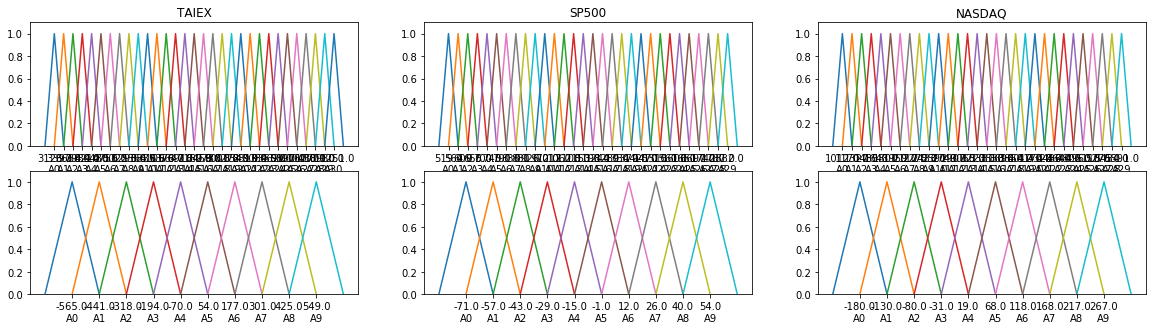

In [6]:
from pyFTS.partitioners import Grid, Util as pUtil

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[20,5])


partitioners = {}
partitioners_diff = {}

for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)

    partitioner = Grid.GridPartitioner(data=dataset, npart=30)
    partitioners[dataset_name] = partitioner
    partitioner_diff = Grid.GridPartitioner(data=dataset, npart=10, transformation=tdiff)
    partitioners_diff[dataset_name] = partitioner_diff

    pUtil.plot_sets(dataset, [partitioner.sets], titles=[dataset_name], axis=ax[0][count])
    pUtil.plot_sets(dataset, [partitioner_diff.sets], titles=[''], axis=ax[1][count])

## Fitting models

### With original data

In [8]:
for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)

    model1 = yu.WeightedFTS(partitioner=partitioners[dataset_name])
    model1.name=dataset_name
    model1.fit(dataset[:train_split], save_model=True, file_path='model1'+dataset_name, order=1)


### With transformed data

In [9]:
for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)

    model2 = yu.WeightedFTS(partitioner=partitioners_diff[dataset_name])
    model2.name=dataset_name
    model2.append_transformation(tdiff)
    model2.fit(dataset[:train_split], save_model=True, file_path='model2'+dataset_name, order=1)


## Predicting with the models

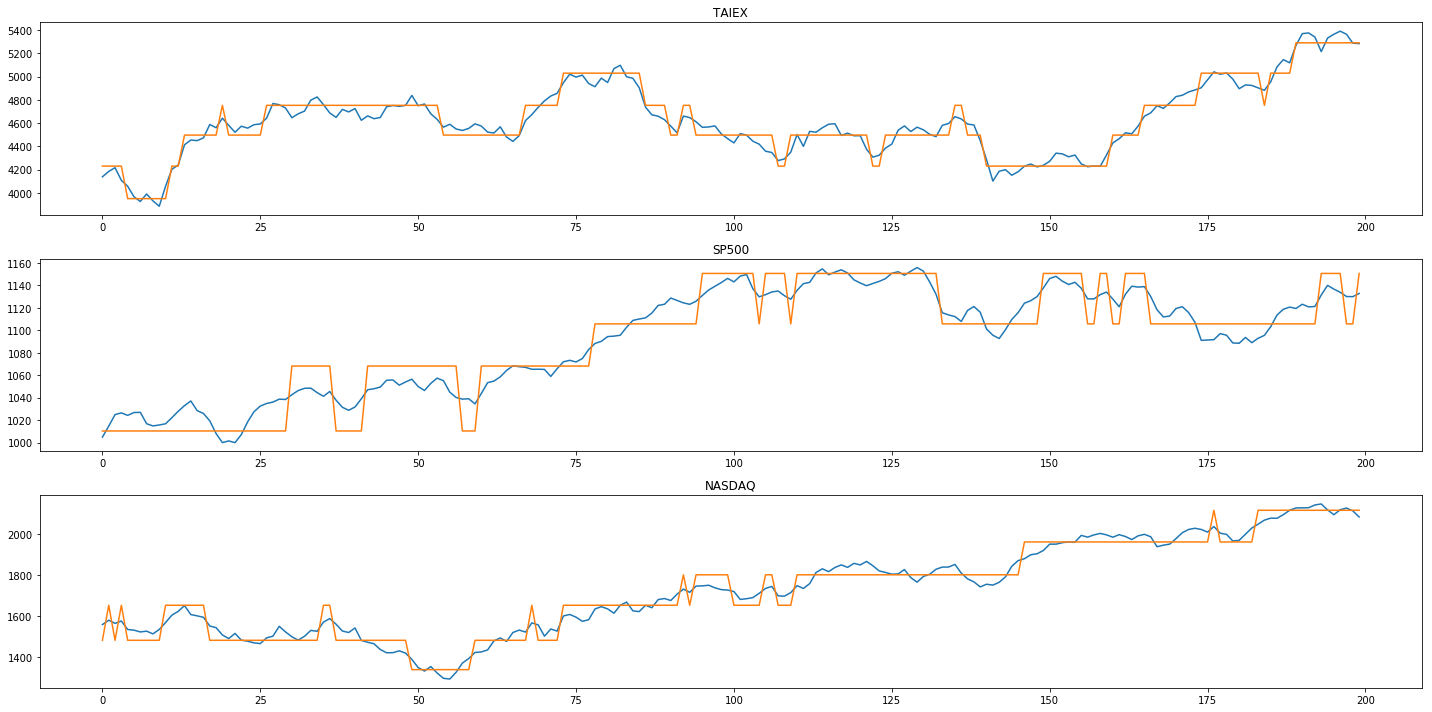

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[20,10])


for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)
    
    ax[count].plot(dataset[train_split:train_split+200])

    model1 = cUtil.load_obj('model1'+dataset_name)

    forecasts = model1.predict(dataset[train_split:train_split+200])
    
    ax[count].plot(forecasts)
    
    ax[count].set_title(dataset_name)
    
plt.tight_layout()

In [11]:
from pyFTS.benchmarks import Measures

rows = []

for count,dataset_name in enumerate(dataset_names):
    row = [dataset_name]
    
    dataset = get_dataset(dataset_name)
    
    test = dataset[train_split:train_split+200]

    model1 = cUtil.load_obj('model1'+dataset_name)
    
    row.extend(Measures.get_point_statistics(test, model1))
    
    rows.append(row)
    
    
pd.DataFrame(rows,columns=["Dataset","RMSE","SMAPE","Theil's U"])
    
    
    

Dataset   RMSE  SMAPE  Theil's U
0   TAIEX  92.76   0.79       1.41
1   SP500  16.01   0.63       2.88
2  NASDAQ  48.70   1.19       2.03

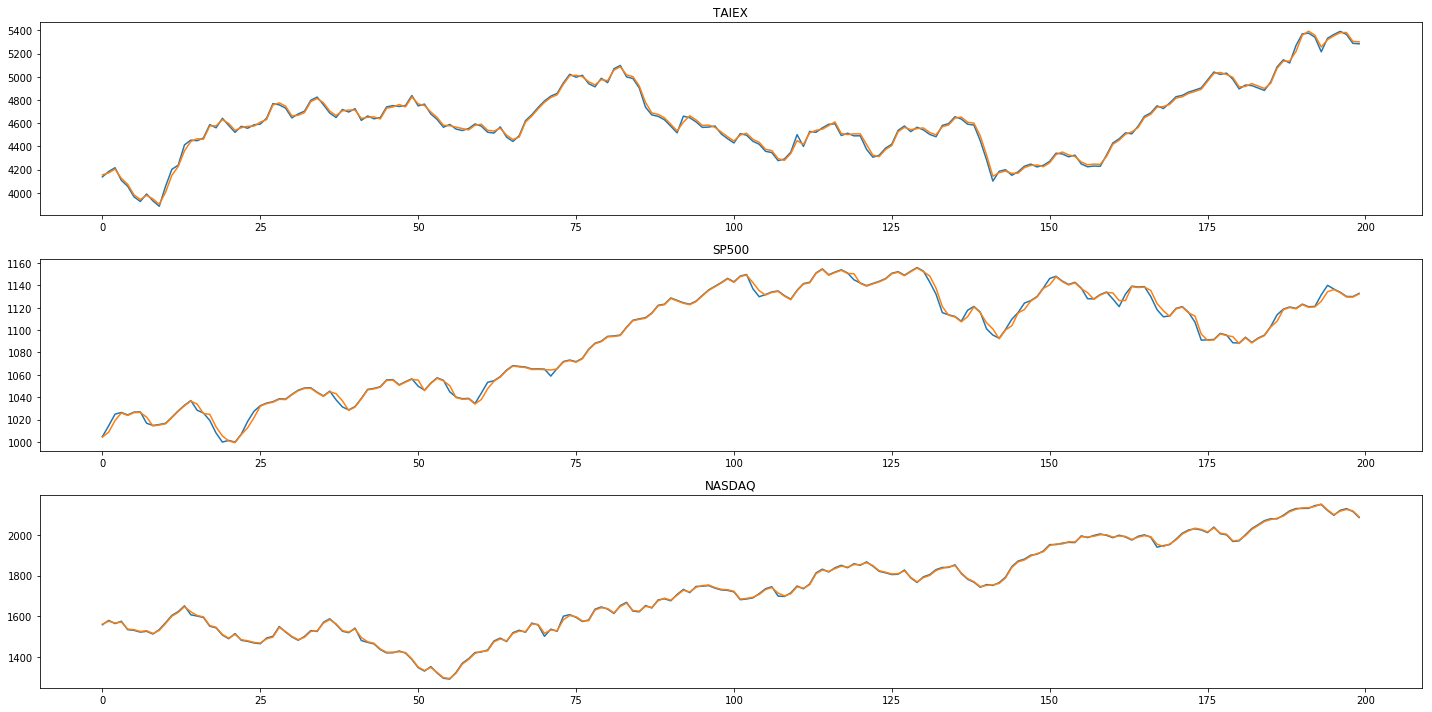

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[20,10])


for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)
    
    ax[count].plot(dataset[train_split:train_split+200])

    model1 = cUtil.load_obj('model2'+dataset_name)

    forecasts = model1.predict(dataset[train_split:train_split+200])
    
    ax[count].plot(forecasts)
    
    ax[count].set_title(dataset_name)
    
plt.tight_layout()

In [13]:
from pyFTS.benchmarks import Measures

rows = []

for count,dataset_name in enumerate(dataset_names):
    row = [dataset_name]
    
    dataset = get_dataset(dataset_name)
    
    test = dataset[train_split:train_split+200]

    model1 = cUtil.load_obj('model2'+dataset_name)
    
    row.extend(Measures.get_point_statistics(test, model1))
    
    rows.append(row)
    
    
pd.DataFrame(rows,columns=["Dataset","RMSE","SMAPE","Theil's U"])
    
    
    

Dataset   RMSE  SMAPE  Theil's U
0   TAIEX  71.41   0.61       1.09
1   SP500   6.93   0.25       1.25
2  NASDAQ  24.51   0.60       1.02

## Residual Analysis

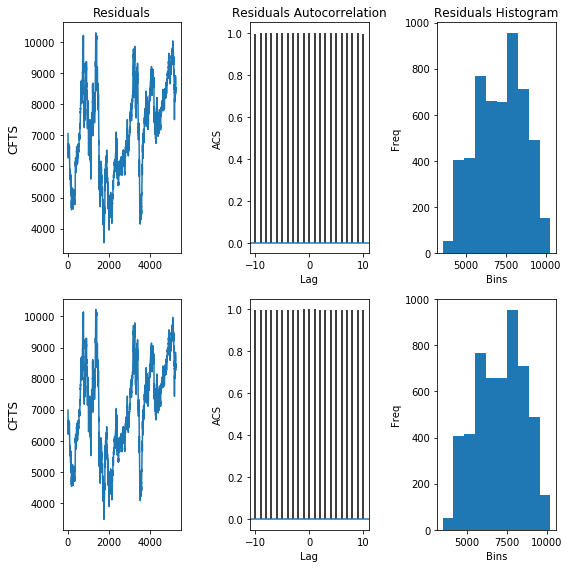

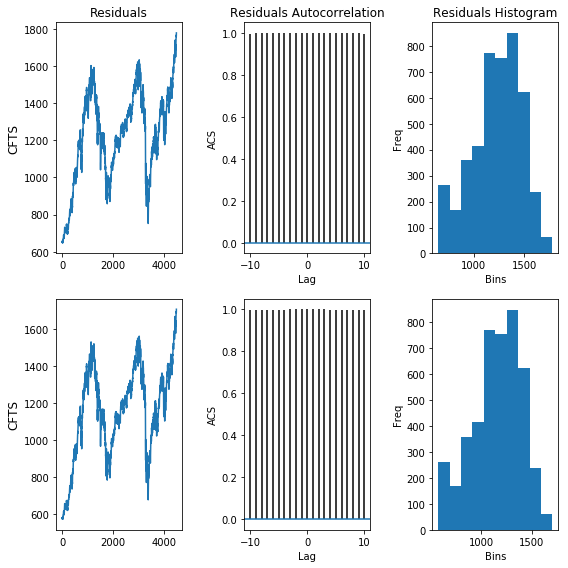

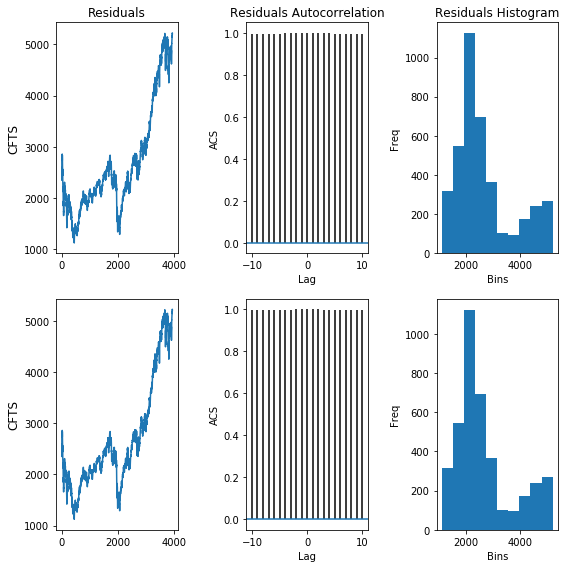

In [34]:
from pyFTS.benchmarks import ResidualAnalysis as ra

for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)
    
    model1 = cUtil.load_obj('model1'+dataset_name)
    model1 = cUtil.load_obj('model2'+dataset_name)

    ra.plot_residuals(dataset, [model1, model2])